In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from IPython.display import HTML,display
from matplotlib import pyplot as plt
import pickle

In [2]:
data = pd.read_csv('data/student-mat.csv',sep=";")

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.shape

(395, 33)

In [5]:
data = data[['G1','G2','G3','studytime','failures','absences']]

In [6]:
data

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [7]:
predict = 'G3'

In [8]:
X = np.array(data.drop([predict],1))
Y = np.array(data[predict])

In [16]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, test_size = 0.1)

## Save best model with high accuracy

In [10]:
best = 0
for _ in range(50):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y, test_size = 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    accuracy = linear.score(x_test,y_test)
    print(accuracy*100)
    
    if accuracy > best:
        best = accuracy
        with open("student_model.pickle", "wb") as f:
            pickle.dump(linear, f)
    


75.59581541863956
87.46502047707642
89.35604877991206
78.08142208761365
79.2460781913364
86.57343550155123
74.81995630115921
88.11482890002695
80.94035025099726
85.2672679054169
86.75015272094126
87.72981680967042
75.0517491224691
91.4648421971159
72.97704943415856
91.00716503845217
76.24370747523052
82.61139958033377
83.92157972213822
85.57881894575507
91.75083175079854
82.84698179350247
80.63597796523237
90.22137104346884
86.07011864438591
82.30210983546769
90.95051504480651
82.29823227500893
88.11091271997438
80.91969021509685
66.15394414129668
83.45329090660296
89.49282681339405
80.9541815776629
82.87186016994931
85.24685922096154
87.73469842720138
78.72563901810567
84.9589185303786
87.85105065465626
85.5151101134599
84.01453720957726
87.85941756233076
80.94292514835817
80.88303570400997
73.86208530739619
87.63871758475597
81.30616216272361
83.79039762964801
84.14268768136151


In [18]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_test,y_test)

0.7811148399233238

In [11]:
pickle_file = open("student_model.pickle", "rb")
linear = pickle.load(pickle_file)

In [20]:
predictions = linear.predict(x_test)
print(len(predictions))
#predictions[2]
y_test[2]

40


9

## Grade Prediction of student

In [13]:
html = "<table>"
html+= "<tr>"
html+= "<th><h3>Predicted Grade</h3></th>"
html += "<th><h3>Actual Grade</h3></th>"
html += "</tr>"
for i in range(len(predictions)):
    html+="<tr>"
    html+="<td>%s</td>"%(round(predictions[i],4))
    html+="<td>%s</td>"%(y_test[i])
    html+="</tr>"
html+="</table>"
display(HTML(html))

Predicted Grade,Actual Grade
15.0963,15
12.8127,13
14.9239,15
8.3492,8
8.594,11
11.9276,11
9.0793,10
-0.6294,0
10.7309,10
8.275,10


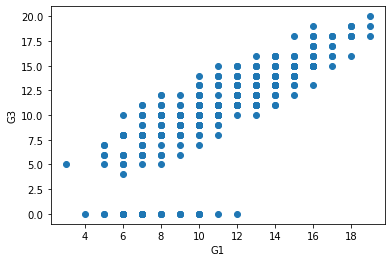

In [14]:
plt.scatter(data["G1"],data["G3"])
plt.xlabel("G1")
plt.ylabel("G3")
plt.show()